In [2]:
# ML code to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just 2 variables.

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [4]:
# read the data
df = pd.read_csv("student_scores.csv")

In [5]:
# check the raw data
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
# check the description of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# change the datatype of 'Scores' column to int8


In [9]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

Text(24.625000000000007, 0.5, 'Marks Obtained')

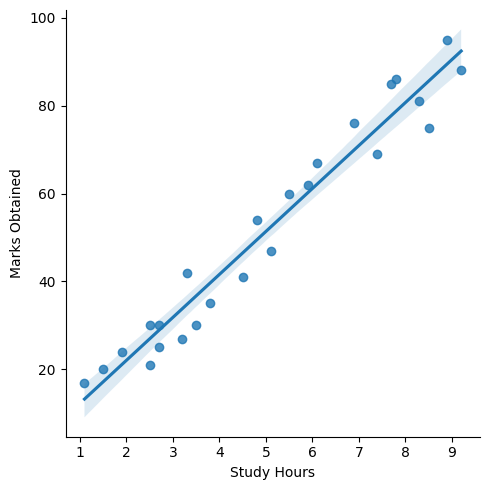

In [10]:
# Data Visualization

# plt.scatter(X, y) ## lmplot will do the job of drawing a line
sns.lmplot(data = df, x = 'Hours', y = 'Scores')
plt.xlabel("Study Hours")
plt.ylabel("Marks Obtained")


In [11]:
# reshape the arrays X and y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [12]:
# Splitting the Data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.85)

In [13]:
# use lazypredictor to check the accuracy of the model
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# check the accuracy of the model
models

100%|██████████| 42/42 [00:01<00:00, 36.22it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,0.94,0.95,5.89,0.02
TransformedTargetRegressor,0.94,0.95,5.91,0.01
OrthogonalMatchingPursuit,0.94,0.95,5.91,0.02
LassoLarsIC,0.94,0.95,5.91,0.01
Lars,0.94,0.95,5.91,0.01
RANSACRegressor,0.94,0.95,5.91,0.01
LinearRegression,0.94,0.95,5.91,0.01
SGDRegressor,0.94,0.94,6.10,0.01
BayesianRidge,0.94,0.94,6.12,0.01


In [14]:
# create a object for Linear Regression
LR = LinearRegression(n_jobs=32)

# fit the model
LR.fit(X_train, y_train)

LinearRegression(n_jobs=32)

In [15]:
# check accuracy of the prediction using R2 score
LR.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))

0.9455271124638256

In [16]:
# check the accuracy of the model using mean absolute error
y_pred = LR.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.162868793475652


In [18]:
# take user input and predict the result

hours = float(input("Enter the number of hours you studied: "))
result = LR.predict([[hours]])[0][0]
if result > 100:
    result = 100
print("The predicted score is: ", result)

The predicted score is:  59.589709762532976
